In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import glob
#from netCDF4 import Dataset

In [2]:
filesindir = []
for i, file in enumerate(glob.glob('./input/*')):
    filesindir.append(file)
    print(i, file)
#print(filesindir)

0 ./input\19x37.png
1 ./input\20x37.png
2 ./input\8x75.png
3 ./input\Gap_12x75f2_on_POLf0-s.txt
4 ./input\Gap_12x75f2_on_POLf0.txt
5 ./input\Gap_19x37f2_on_POLf0-s.txt
6 ./input\Gap_19x37f2_on_POLf0.txt
7 ./input\Gap_19x37f4_on_POLf0-s.txt
8 ./input\Gap_19x37f4_on_POLf0.txt
9 ./input\Gap_19x37fanf2_on_POLf0-s.txt
10 ./input\Gap_19x37fanf2_on_POLf0.txt
11 ./input\Gap_19x37fanf4_on_POLf0-s.txt
12 ./input\Gap_19x37fanf4_on_POLf0.txt
13 ./input\Gap_REFf2_on_POLf0-s.txt
14 ./input\Gap_REFf2_on_POLf0.txt
15 ./input\POL_f3_on_POL_f0.txt
16 ./input\RAM12x75_f2_on_POL_f0.txt
17 ./input\RAM12x75_f3_on_POL_f0.txt
18 ./input\RAM14x75_f3_on_POL_f0.txt
19 ./input\RAM14x75_f4_on_POL_f0.txt
20 ./input\RAM16x75_f4_on_POL_f0.txt
21 ./input\RAM16x75_f5_on_POL_f0.txt
22 ./input\RAM17_f3_on_POL_f0.txt
23 ./input\RAM17_fanf3_on_POL_f0.txt
24 ./input\RAM19_f2_on_POL_f0.txt
25 ./input\RAM19_f2_on_POL_f0f1_comb.txt
26 ./input\RAM19_f2_on_POL_f0_comb.txt
27 ./input\RAM19_f3_on_POL_f0.txt
28 ./input\RAM19_f3_on_

In [3]:
def readtodataframe(file, scenario):
    path = './input/'
    filename = path + file + '.txt'
    column_names = ['BasShotNo', 'MonShotNo', 'BasRecvNo', 'MonRecvNo', 'OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']
    rowstoskip = 2
    df_raw = pd.read_csv(filename, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
    df_raw['Scenario'] = scenario
    return df_raw

In [4]:
'''
df_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')
df_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')
df_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')
df_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')
df_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')
df_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')
'''

"\ndf_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')\ndf_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')\ndf_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')\ndf_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')\n"

In [5]:
#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('Gap_REFf2_on_POLf0-s', '10x75.5m - 2deg on 8x75m')
df_2 = readtodataframe('Gap_12x75f2_on_POLf0-s', '12x75m - 2deg on 8x75m')
#df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
#df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
#df_5 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
#df_6 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_3 = readtodataframe('Gap_19x37f2_on_POLf0-s', '19x37.5m - 2deg on 8x75m')
#df_5 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_4 = readtodataframe('Gap_19x37f4_on_POLf0-s', '19x37.5m - 4deg on 8x75m')
df_5 = readtodataframe('Gap_19x37fanf2_on_POLf0-s', '19x37.5m - 150% Fanning - 2deg on 8x75m')
df_6 = readtodataframe('Gap_19x37fanf4_on_POLf0-s', '19x37.5m - 150% Fanning - 4deg on 8x75m')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
'''#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')
df_2 = readtodataframe('Gap_12x75f2_on_POLf0', '12x75m - 2deg on 8x75m')
df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
df_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')
df_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
'''

"#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')\ndf_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')\ndf_2 = readtodataframe('Gap_12x75f2_on_POLf0', '12x75m - 2deg on 8x75m')\ndf_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')\ndf_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')\ndf_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')\ndf_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')\n"

In [7]:
def offset_split(df, channo):
    df['Channel Range'] = df['BasRecvNo'].apply(lambda x: '< '+str(channo) if ((x % 408 < channo) & (x % 408 > 0)) else '> '+str(channo))
    return df
    

In [8]:
df_1 = offset_split(df_1, 100)
df_2 = offset_split(df_2, 100)
df_3 = offset_split(df_3, 100)
df_4 = offset_split(df_4, 100)
df_5 = offset_split(df_5, 100)
df_6 = offset_split(df_6, 100)

In [9]:
df_1.replace(-999.25, np.nan, inplace=True)
df_2.replace(-999.25, np.nan, inplace=True)
df_3.replace(-999.25, np.nan, inplace=True) 
df_4.replace(-999.25, np.nan, inplace=True)
df_5.replace(-999.25, np.nan, inplace=True) 
df_6.replace(-999.25, np.nan, inplace=True) 

In [10]:
df_combined = pd.concat([df_1, 
                         df_2, 
                         df_3, 
                         df_4, 
                         df_5,
                         df_6,])

In [11]:
def plot_dist(df, attrib, maxval, title, plttype='violin'):
    sns.set_style("darkgrid")
    sns.set_context('poster')
    sns.set_palette('Paired')
    plt.figure(figsize=(20,16))
    plt.title(title)
    plt.xticks(rotation=20)
    plt.gca().invert_yaxis()
    plt.ylim(maxval, -maxval/20)
    if plttype == 'violin':
        #sns.violinplot(data=df[df[attrib] <= 70], x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
        #sns.violinplot(data=df[df[attrib] <= maxval], x='Scenario', y=attrib, split=True, cut=0, scale='count')
        sns.violinplot(data=df, x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
    else:
        sns.boxplot(data=df, x='Scenario', y=attrib)#, hue='Channel Range')

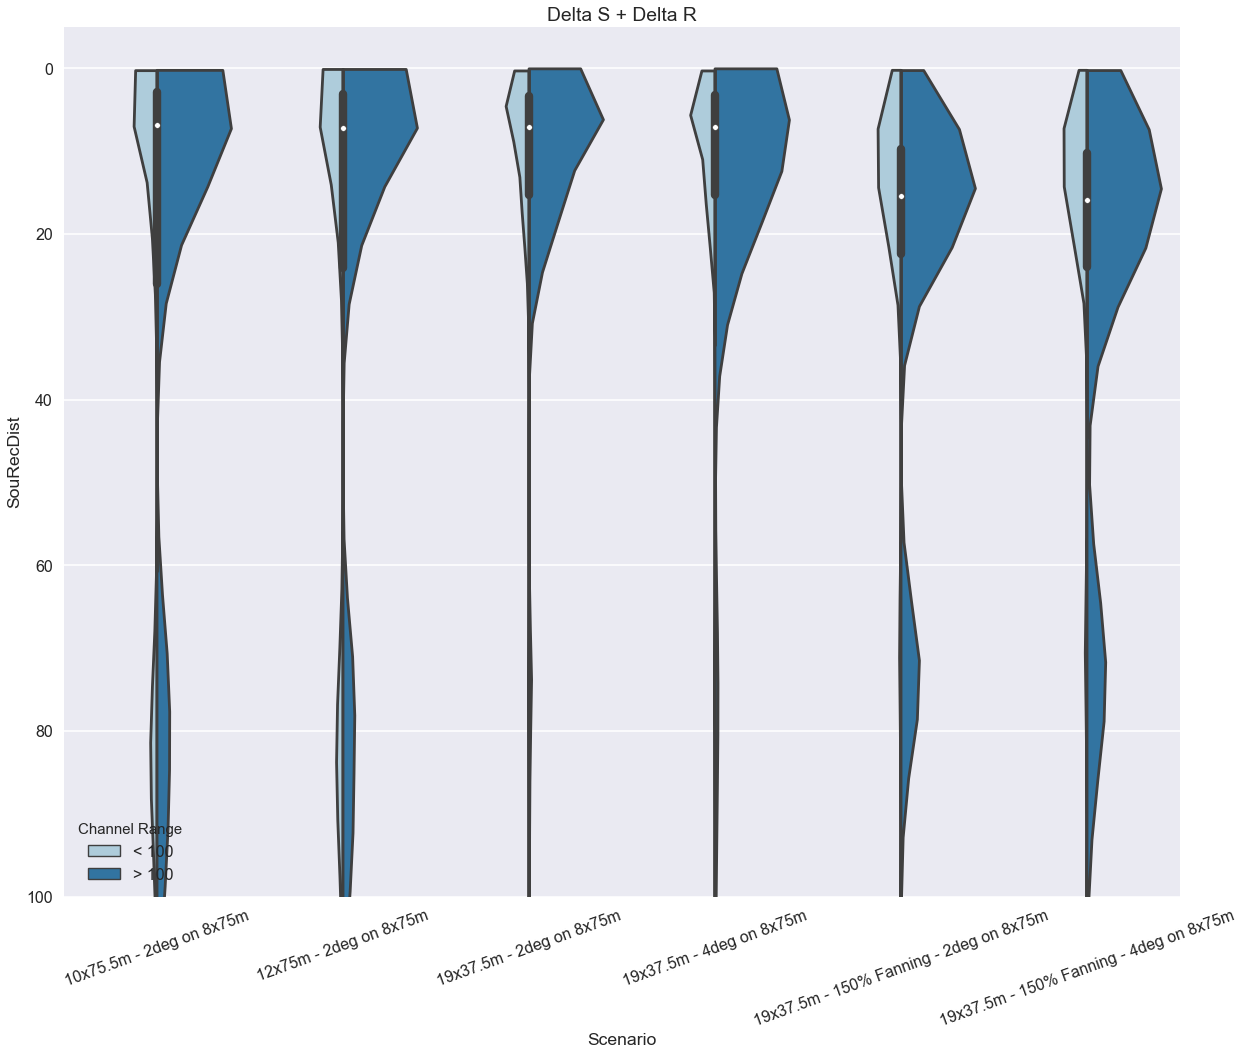

In [12]:
plot_dist(df_combined, 'SouRecDist', 100, 'Delta S + Delta R', plttype='violin')

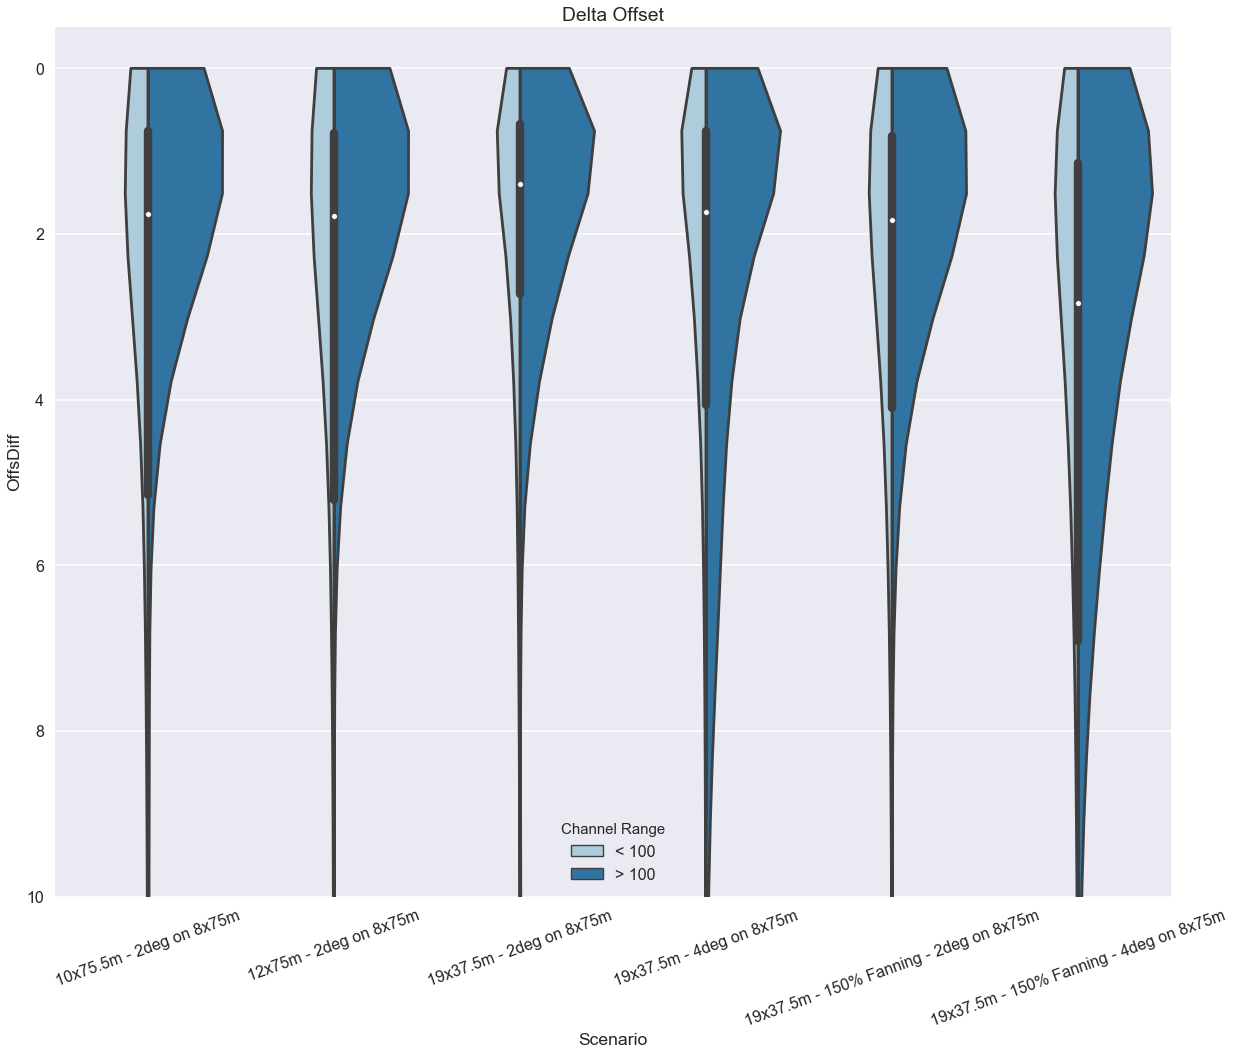

In [13]:
plot_dist(df_combined, 'OffsDiff', 10, 'Delta Offset', plttype='violin')

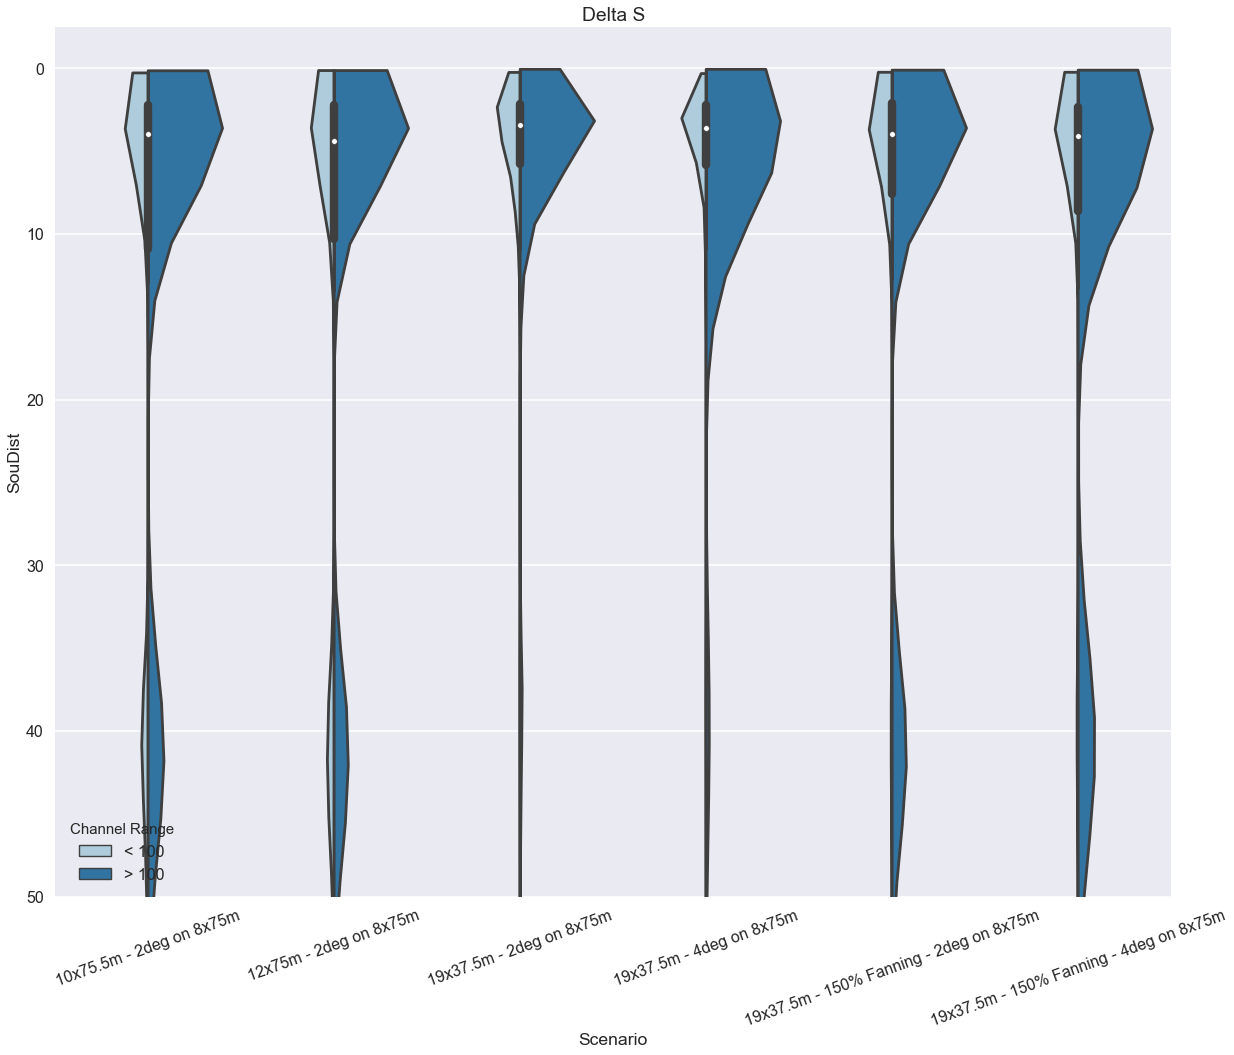

In [14]:
plot_dist(df_combined, 'SouDist', 50, 'Delta S', plttype='violin')

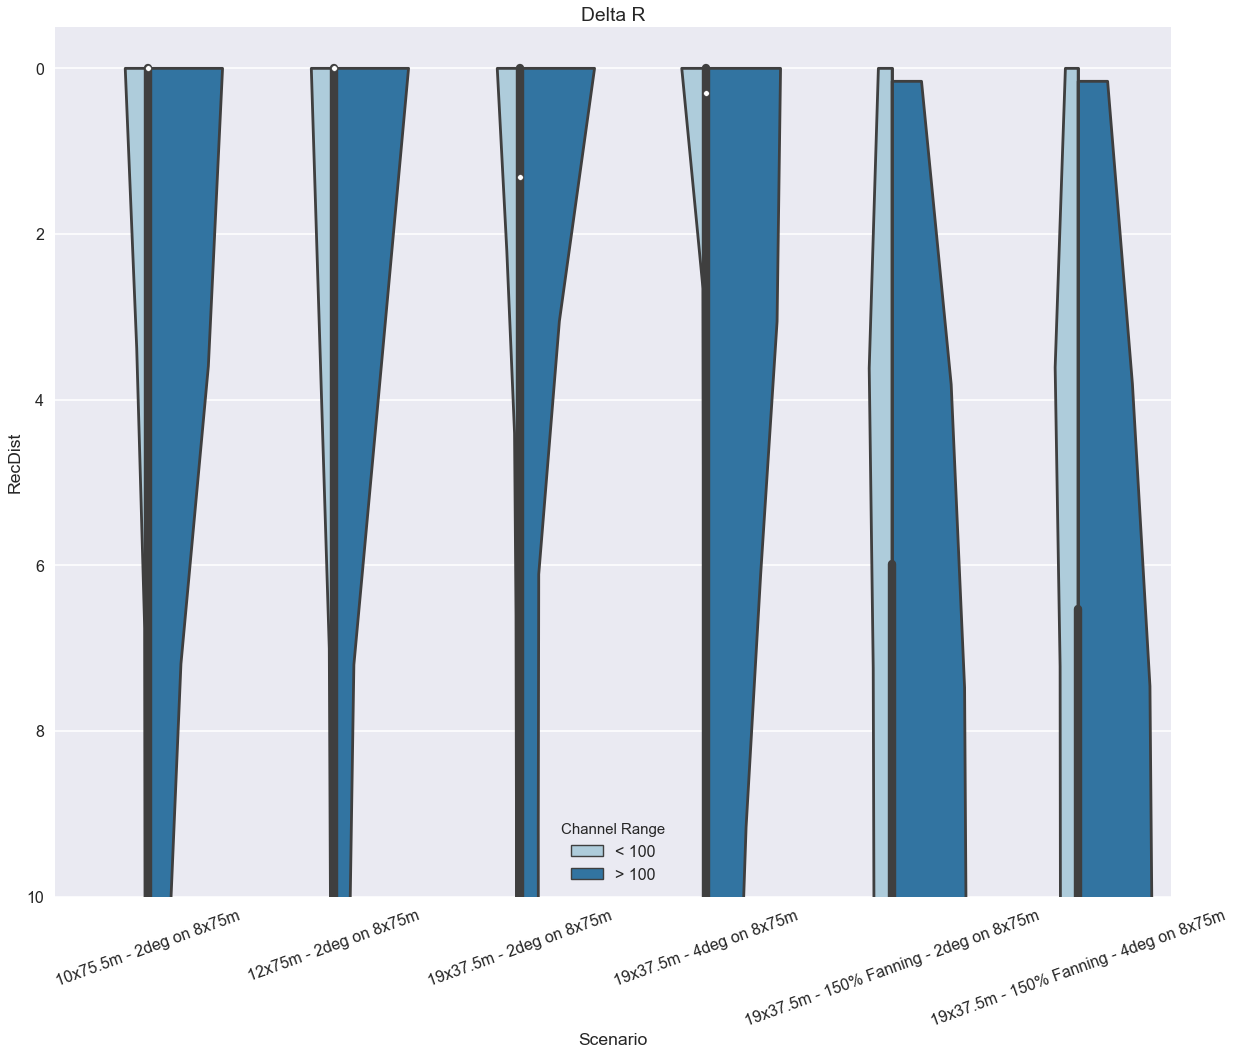

In [15]:
plot_dist(df_combined, 'RecDist', 10, 'Delta R', plttype='violin')

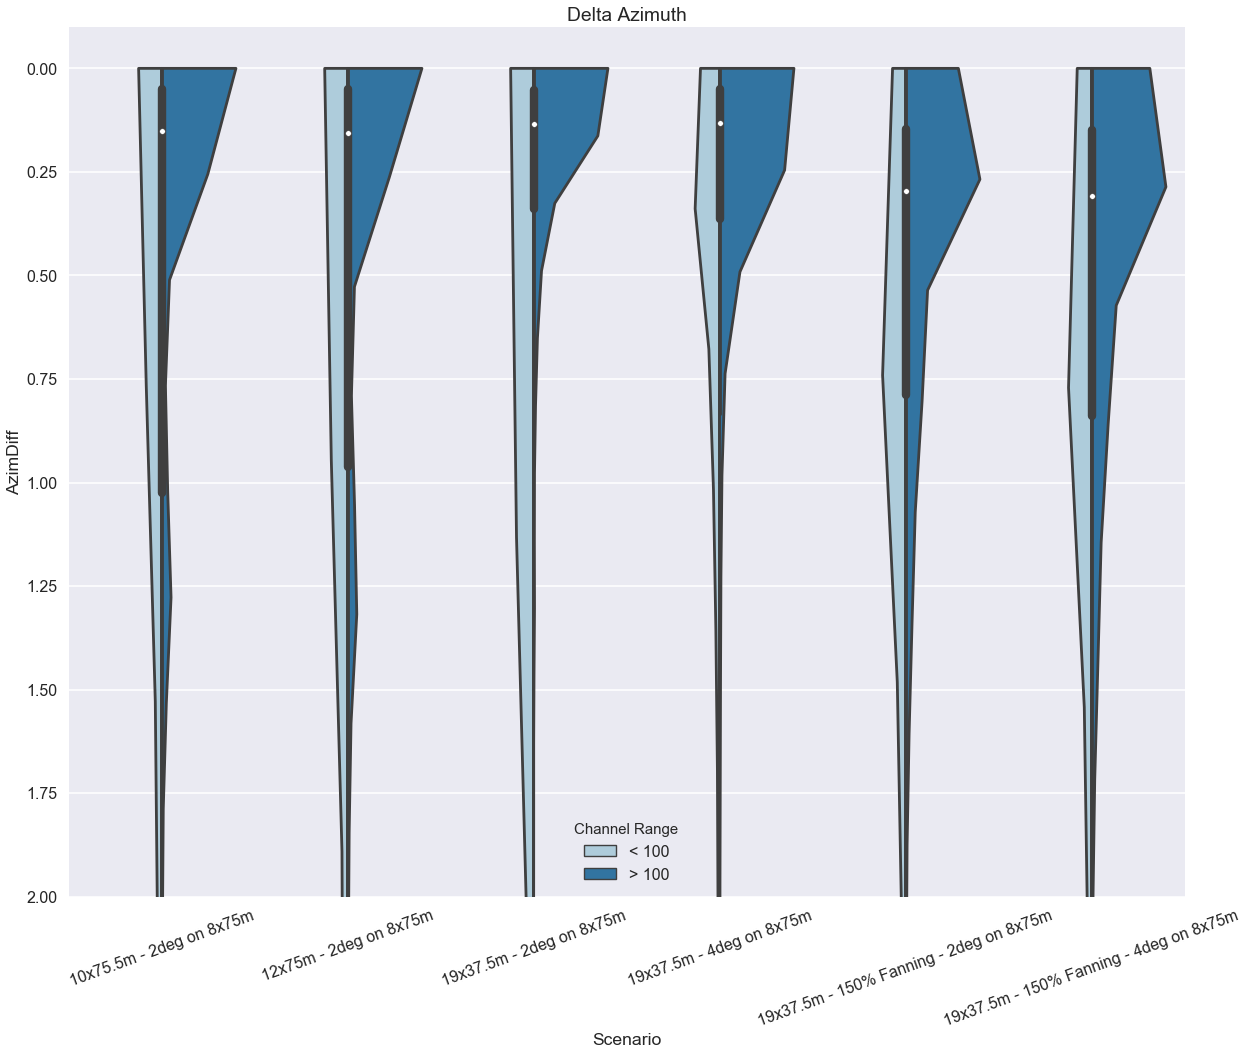

In [16]:
plot_dist(df_combined, 'AzimDiff', 2, 'Delta Azimuth', plttype='violin')

In [17]:
def make_summary(df, attribute):
    #summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.9])[['OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']].round(decimals=1).T
    summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])[[attribute]].round(decimals=1)
    #summary['Scenario'] = df[['Scenario']].iloc[0,0]
    #summary = summary.set_index([attribute])
    summary = summary.T
    summary['Scenario'] = df[['Scenario']].iloc[0,0]
    summary = summary.set_index(['Scenario']).reset_index()
    return summary

In [18]:
def makefullsummary(attribute):
    summary = make_summary(df_1, attribute)
    summary = summary.append(make_summary(df_2, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_3, attribute), ignore_index=True)    
    summary = summary.append(make_summary(df_4, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_5, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_6, attribute), ignore_index=True)
    return summary

In [19]:
def make_heatmap(df, caption):
    cm = sns.light_palette("red", as_cmap=True)
    s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index().hide_columns(['count'])
    #s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index()
    return s
    

In [20]:
summary_offsetdiff = makefullsummary('OffsDiff')
make_heatmap(summary_offsetdiff, 'Delta Offset')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,9.4,15.5,0,0.3,0.8,1.8,5.2,36.8,74.9
12x75m - 2deg on 8x75m,9.6,15.6,0,0.3,0.8,1.8,5.2,37,74.9
19x37.5m - 2deg on 8x75m,3.9,10,0,0.3,0.7,1.4,2.7,4.8,74.9
19x37.5m - 4deg on 8x75m,5,10.7,0,0.3,0.8,1.7,4.1,7.8,74.9
19x37.5m - 150% Fanning - 2deg on 8x75m,8.3,14.5,0,0.3,0.8,1.8,4.1,36.2,75
19x37.5m - 150% Fanning - 4deg on 8x75m,9.8,15.3,0,0.4,1.1,2.8,6.9,36.5,74.9


In [21]:
summary_sourcerecdist = makefullsummary('SouRecDist')
make_heatmap(summary_sourcerecdist, 'Delta S + Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,40.8,102.7,0.2,1.6,2.9,6.9,26,89,697.1
12x75m - 2deg on 8x75m,33.5,79.2,0.1,1.5,3,7.2,24.1,87.3,702.1
19x37.5m - 2deg on 8x75m,20.2,53.1,0.1,1.8,3.3,7.1,15.3,23.1,608.6
19x37.5m - 4deg on 8x75m,36.3,116,0.1,1.7,3.2,7.1,15.3,24.6,612.5
19x37.5m - 150% Fanning - 2deg on 8x75m,34.4,79.2,0.2,5.9,9.7,15.4,22.4,74.1,705.5
19x37.5m - 150% Fanning - 4deg on 8x75m,48.7,115.7,0.2,6.5,10.2,15.9,24,76.5,707.6


In [22]:
summary_sourcedist = makefullsummary('SouDist')
make_heatmap(summary_sourcedist, 'Delta S')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,20.5,51.3,0.1,1.3,2.2,4,10.9,43.3,343.8
12x75m - 2deg on 8x75m,16.9,39.5,0.1,1.1,2.2,4.4,10.3,43.2,346
19x37.5m - 2deg on 8x75m,9.7,26.5,0.1,1.2,2.1,3.4,5.8,9.3,308.6
19x37.5m - 4deg on 8x75m,17.8,58.1,0.1,1.2,2.2,3.6,5.8,10.2,310.2
19x37.5m - 150% Fanning - 2deg on 8x75m,15.5,40.7,0.1,1.4,2.1,4,7.6,41.4,347
19x37.5m - 150% Fanning - 4deg on 8x75m,22.6,59,0.1,1.4,2.3,4.1,8.6,42.7,352


In [23]:
summary_recdist = makefullsummary('RecDist')
make_heatmap(summary_recdist, 'Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,20.3,51.7,0,0,0,0,21,47.1,356
12x75m - 2deg on 8x75m,16.6,40,0,0,0,0,19.5,45.3,356.4
19x37.5m - 2deg on 8x75m,10.6,27,0,0,0,1.3,11.4,18.5,302.3
19x37.5m - 4deg on 8x75m,18.5,58.1,0,0,0,0.3,11.4,19.9,302.3
19x37.5m - 150% Fanning - 2deg on 8x75m,19,38.8,0,2.6,6,11.7,18,32.1,362.4
19x37.5m - 150% Fanning - 4deg on 8x75m,26.1,56.9,0,3.2,6.5,12.1,19.2,34.9,361.6


In [24]:
summary_azmdiff = makefullsummary('AzimDiff')
make_heatmap(summary_azmdiff, 'Delta Azimuth')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,1,2.6,0,0,0,0.2,1,3.2,75.7
12x75m - 2deg on 8x75m,1,3,0,0,0,0.2,1,2.8,93.6
19x37.5m - 2deg on 8x75m,0.6,3.5,0,0,0.1,0.1,0.3,1,112.1
19x37.5m - 4deg on 8x75m,0.8,2.3,0,0,0.1,0.1,0.4,1.2,33.5
19x37.5m - 150% Fanning - 2deg on 8x75m,0.8,2,0,0.1,0.1,0.3,0.8,1.4,73.4
19x37.5m - 150% Fanning - 4deg on 8x75m,1,2.3,0,0.1,0.1,0.3,0.8,1.6,76.3


In [25]:
cm = sns.light_palette("green", as_cmap=True)
s = summary_sourcerecdist[['Scenario','count']].style.set_caption('Number of Traces').background_gradient(cmap=cm).hide_index()

In [26]:
s

Scenario,count
10x75.5m - 2deg on 8x75m,660455
12x75m - 2deg on 8x75m,666895
19x37.5m - 2deg on 8x75m,686332
19x37.5m - 4deg on 8x75m,644422
19x37.5m - 150% Fanning - 2deg on 8x75m,669756
19x37.5m - 150% Fanning - 4deg on 8x75m,668778


In [27]:
df_combined.describe()

,BasShotNo,MonShotNo,BasRecvNo,MonRecvNo,OffsDiff,AzimDiff,CMPInDist,CMPCrDist,SouDist,SouInDist,SouCrDist,RecDist,RecInDist,RecCrDist,SouRecDist
count,3.996640e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996639e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996640e+06,3.996638e+06
mean,1.037697e+03,1.506723e+03,1.628642e+03,3.659240e+03,7.651463e+00,8.441516e-01,3.751602e+00,8.518679e-01,1.710777e+01,1.586166e+01,4.083276e+00,1.847335e+01,1.732432e+01,3.846761e+00,3.558110e+01
std,3.514983e+02,7.654638e+02,9.392445e+02,1.851714e+03,1.399121e+01,2.695331e+00,2.908360e+00,7.198183e-01,4.728866e+01,4.699016e+01,7.249357e+00,4.685387e+01,4.655977e+01,7.335505e+00,9.383303e+01
min,4.760000e+02,4.760000e+02,1.000000e+00,4.000000e+00,1.400910e-06,0.000000e+00,0.000000e+00,0.000000e+00,5.859380e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.859380e-02
25%,7.000000e+02,6.680000e+02,8.050000e+02,2.176750e+03,7.974790e-01,6.789785e-02,1.277340e+00,3.090820e-01,2.199650e+00,1.615230e+00,5.517580e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.354500e+00
50%,1.024000e+03,1.086000e+03,1.667000e+03,3.443000e+03,1.820560e+00,1.974460e-01,3.040040e+00,6.665040e-01,3.866020e+00,3.502930e+00,1.191410e+00,6.729500e+00,6.113280e+00,3.105470e-01,1.059950e+01
75%,1.365000e+03,2.299000e+03,2.429000e+03,5.058000e+03,4.298305e+00,6.571380e-01,5.855960e+00,1.188960e+00,7.224170e+00,6.958980e+00,2.254880e+00,1.615910e+01,1.567090e+01,2.740230e+00,2.007810e+01
max,3.705000e+03,2.426000e+03,3.264000e+03,7.752000e+03,7.495290e+01,1.121460e+02,2.142770e+01,3.995340e+01,3.519690e+02,3.516010e+02,1.467190e+02,3.624310e+02,3.616550e+02,1.500000e+02,7.075730e+02


In [28]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
BasShotNo,686332.0,1098.627798,504.757607,476.000000,915.000000,1027.000000,1391.000000,3705.00000
MonShotNo,686332.0,1517.128553,766.325213,476.000000,672.000000,1093.000000,2300.000000,2426.00000
BasRecvNo,686332.0,1609.122390,915.936512,1.000000,809.000000,1664.000000,2373.000000,3264.00000
MonRecvNo,686332.0,4182.607514,1951.611546,31.000000,2615.000000,4266.000000,5866.000000,7752.00000
OffsDiff,686332.0,3.899143,9.964230,0.000002,0.667493,1.390230,2.726762,74.91080
AzimDiff,686332.0,0.598612,3.507136,0.000000,0.051875,0.133854,0.340093,112.14600
CMPDist,686332.0,3.538195,2.721290,0.009174,1.395080,2.630680,5.125420,18.43470
CMPInDist,686332.0,3.349497,2.797008,0.000000,1.124020,2.493650,5.025880,18.39550
CMPCrDist,686332.0,0.749097,0.566319,0.000000,0.300781,0.614746,1.097170,8.20654
SouDist,686332.0,9.671859,26.544537,0.058594,2.138300,3.394080,5.767560,308.56800


In [45]:
df_6[['CMPDist']].dtypes

CMPDist    object
dtype: object